1. Import librairy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


3. Print the columns name to know what to correlate

In [4]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

4. How many entries do you have ?

In [17]:
len(data)

48895

5. Plot the matrix to visualise correlation

Text(0.5, 1.0, 'Correlation matrix')

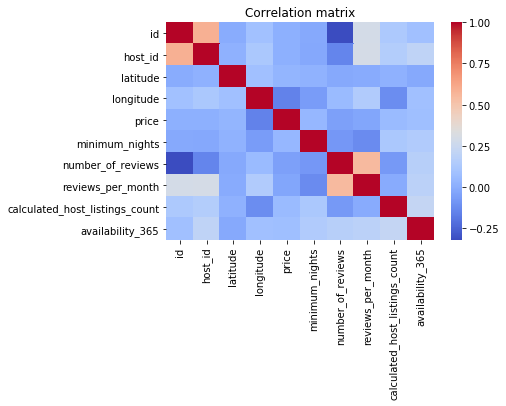

In [3]:
sns.heatmap(data.corr(),cmap='coolwarm')
plt.title('Correlation matrix')

6. We want to know if the number of reviews impacts the price

Text(0.5, 1.0, 'Does the number of review impact the price ?')

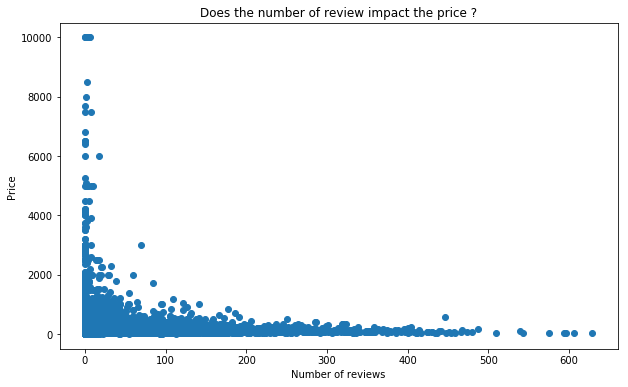

In [16]:
fig, ax = plt.subplots(figsize = (10,6))
plt.scatter(data['number_of_reviews'], data['price'])
plt.xlabel('Number of reviews')
plt.ylabel('Price')
plt.title('Does the number of review impact the price ?')

7. Does the type of habitation impact the price ?

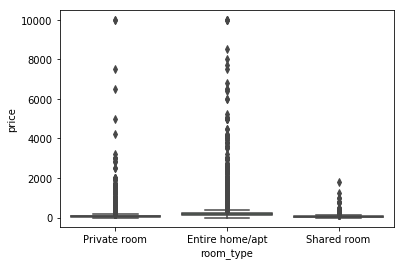

In [19]:
sns.boxplot(x='room_type',y='price',data=data,palette='rainbow')

8. What is the majoritary type?

Text(0, 0.5, 'Count')

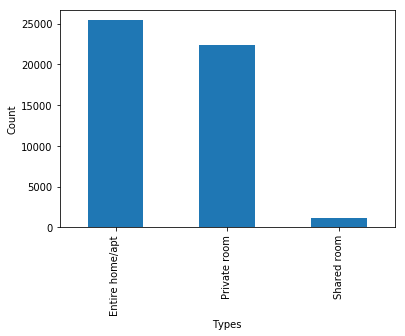

In [20]:
data['room_type'].value_counts().plot(kind='bar')
plt.xlabel('Types')
plt.ylabel('Count')

9. We suppose that the more comment you have, the more night the room is booked.
What's the type that is booked the more?

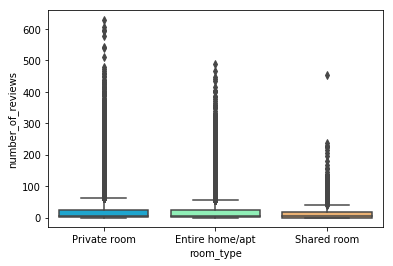

In [21]:
sns.boxplot(x='room_type',y='number_of_reviews',data=data,palette='rainbow')

10. Calculate the price average following the different room type

In [26]:
data[data['room_type'] == 'Shared room']['price'].mean()

70.12758620689655

In [23]:
data[data['room_type'] == 'Private room']['price'].mean()

89.78097285675894

In [25]:
data[data['room_type'] == 'Entire home/apt']['price'].mean()

211.79424613325986

11. Split price distribution between neighbourhood

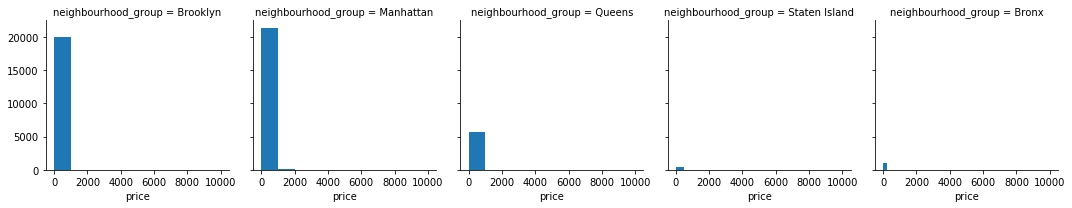

In [28]:
g = sns.FacetGrid(data=data,col='neighbourhood_group')
g.map(plt.hist,'price')

In [ ]:
12. 

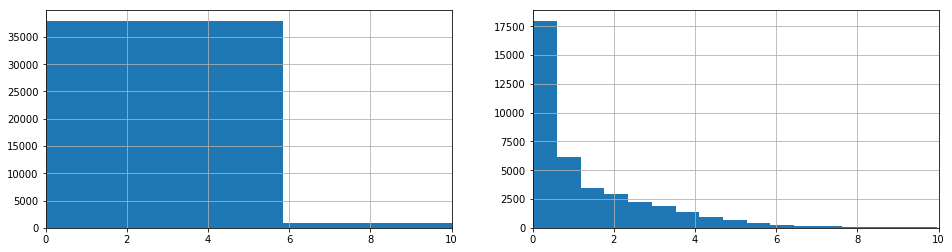

In [142]:
plt.rcParams['figure.figsize'] = (16, 4)
plt.subplot(1,2,1)
plt.xlim(0,10)
data['reviews_per_month'].hist()
plt.subplot(1,2,2)
plt.xlim(0,10)
data['reviews_per_month'].hist(bins=100)


13. Make a pie chart with all the neighbourhood 

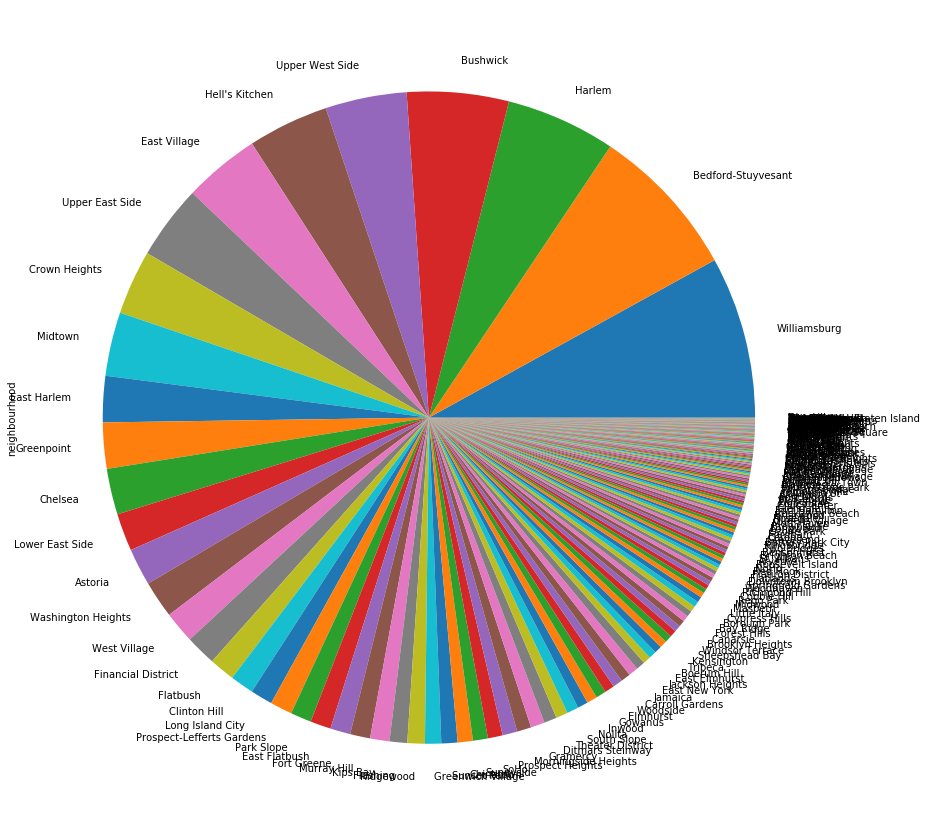

In [146]:
plt.figure(figsize=(15,15))
data["neighbourhood"].value_counts().plot(kind='pie')

14. Make a pie chart with all the neighbourhood group

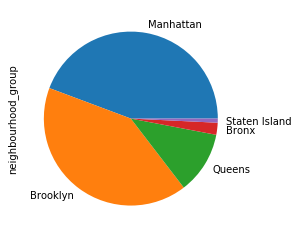

In [151]:
data["neighbourhood_group"].value_counts().plot(kind='pie')

15. Make a new dataframe which list the number of neighbourhood for each neighbourhood_group

In [96]:
#Create a dict with group as key and list of neighbourhood for each group
d = {}
for n_group in data["neighbourhood_group"].unique():
    d[n_group] = list(data[data["neighbourhood_group"]==n_group].neighbourhood.unique())
    
d

In [147]:
#Create a dict with group and a list of number of each neighbourhood appears
#A la place d'avoir le nom des sous quartier on a le nombre de fois ou il aparrait
d2 = {}

for n_group in data["neighbourhood_group"].unique():
    l = []
    for group in data["neighbourhood"].unique():
        n_lines = data[(data["neighbourhood"]==group)&(data["neighbourhood_group"]==n_group)].shape[0]
        #Compte le nombre de fois ou il apparrait (shape = nombre de ligne)
        l.append(n_lines)
    d2[n_group] = l
        
d2

{'Brooklyn': [175,
  0,
  0,
  572,
  0,
  0,
  3714,
  0,
  0,
  0,
  284,
  0,
  3920,
  489,
  0,
  1564,
  506,
  157,
  0,
  0,
  1115,
  2465,
  621,
  0,
  535,
  0,
  0,
  0,
  0,
  357,
  0,
  0,
  154,
  233,
  247,
  83,
  99,
  0,
  177,
  0,
  36,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  500,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  68,
  0,
  0,
  218,
  0,
  0,
  164,
  0,
  55,
  75,
  0,
  0,
  390,
  0,
  0,
  75,
  0,
  135,
  0,
  0,
  0,
  0,
  0,
  141,
  0,
  0,
  0,
  0,
  0,
  42,
  34,
  0,
  0,
  147,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  136,
  0,
  83,
  0,
  0,
  0,
  109,
  0,
  0,
  0,
  0,
  0,
  79,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  12,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  14,
  61,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [153]:
#On transform le dict avec les groups en columns et les nombre en ligne
adj = pd.DataFrame.from_dict(d2)

#On met le nom des lignes = nom de la liste unique (même ordre donc cool)
adj.index = list(data["neighbourhood"].unique())
adj.head()

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Kensington,175,0,0,0,0
Midtown,0,1545,0,0,0
Harlem,0,2658,0,0,0
Clinton Hill,572,0,0,0,0
East Harlem,0,1117,0,0,0


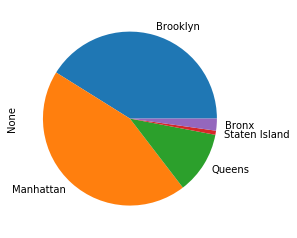

In [149]:
adj.sum(axis=0).plot(kind='pie')

16. Create a Bar chart with only the 10 first neighbourhood

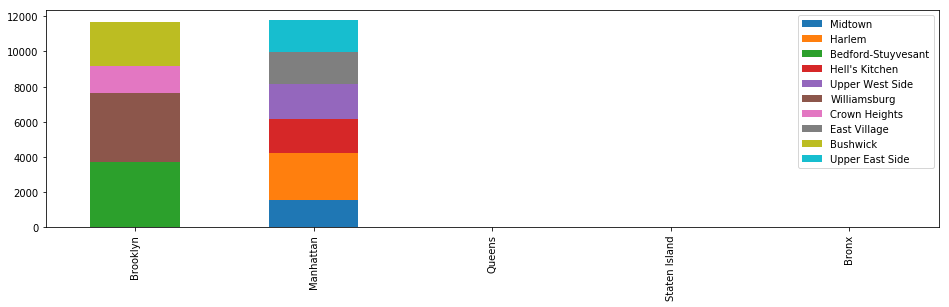

In [154]:
top10 = adj.sum(axis=1).sort_values(ascending=False).head(10).index
top10_adj = adj[adj.index.isin(top10)]

top10_adj.T.plot(kind='bar',stacked=True)

17. Create a chart bar but display the legend for only the top 10 neighbourhood

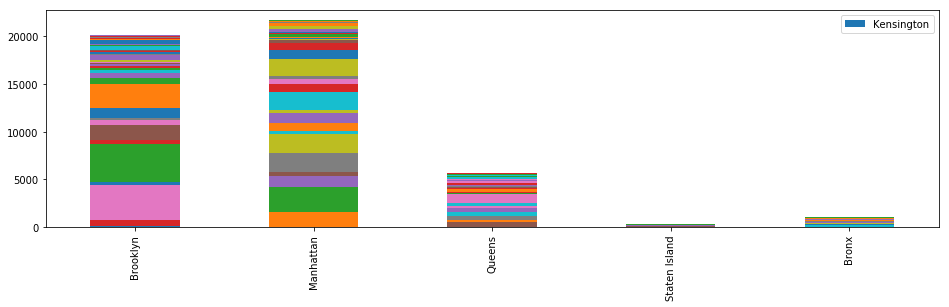

In [156]:
# .T to transpose axis
adj.T.plot(kind='bar',stacked=True) ## 
plt.legend(['Kensington'])


In [79]:
df = data.head().groupby(data['neighbourhood']).count()


#df.plot(kind = 'pie',y ='neighbourhood')

df

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,,,
Allerton,42,42,42,42,42,42,42,42,42,42,42,37,37,42,42
Arden Heights,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Arrochar,21,21,21,21,21,21,21,21,21,21,21,20,20,21,21
Arverne,77,77,77,77,77,77,77,77,77,77,77,66,66,77,77
Astoria,900,900,900,900,900,900,900,900,900,900,900,709,709,900,900
Bath Beach,17,17,17,17,17,17,17,17,17,17,17,15,15,17,17
Battery Park City,70,69,70,70,70,70,70,70,70,70,70,36,36,70,70
Bay Ridge,141,141,141,141,141,141,141,141,141,141,141,115,115,141,141
Bay Terrace,6,6,6,6,6,6,6,6,6,6,6,5,5,6,6


In [81]:
df

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Allerton,42,42,42,42,42,42,42,42,42,42,42,37,37,42,42
1,Arden Heights,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,Arrochar,21,21,21,21,21,21,21,21,21,21,21,20,20,21,21
3,Arverne,77,77,77,77,77,77,77,77,77,77,77,66,66,77,77
4,Astoria,900,900,900,900,900,900,900,900,900,900,900,709,709,900,900
5,Bath Beach,17,17,17,17,17,17,17,17,17,17,17,15,15,17,17
6,Battery Park City,70,69,70,70,70,70,70,70,70,70,70,36,36,70,70
7,Bay Ridge,141,141,141,141,141,141,141,141,141,141,141,115,115,141,141
8,Bay Terrace,6,6,6,6,6,6,6,6,6,6,6,5,5,6,6
9,"Bay Terrace, Staten Island",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


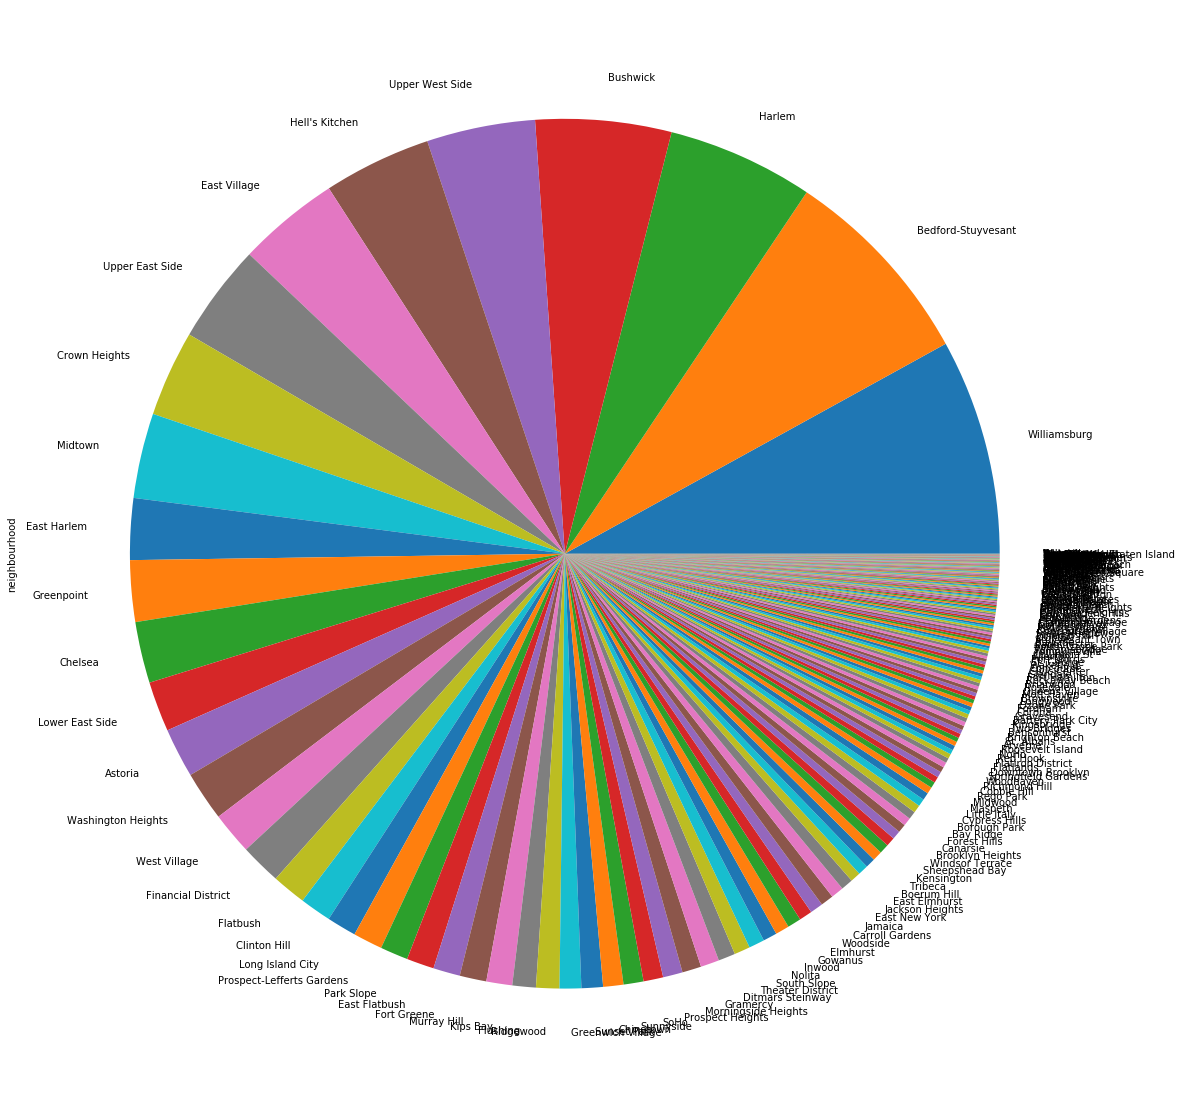

In [144]:
plt.figure(figsize=(20,20))
data["neighbourhood"].value_counts().plot(kind='pie')

#neighbourhoods = data["neighbourhood"].value_counts().head(10).index

top10 = data[data.neighbourhood.isin(neighbourhoods)]

top

df = data.groupby('neighbourhood').count().reset_index()


df['neighbourhood'].plot(kind = 'pie')

#df.plot(kind="pie", )

df

In [68]:
#df = data.head().groupby(data['last_review']).count()
data['last_review'].hist()


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x120bbc8c8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x120bc0268> (for post_execute):


KeyboardInterrupt: 